In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
caffe_root = '../'
sys.path.insert(0, caffe_root+'python')
import caffe

In [3]:
import os
if os.path.isfile(caffe_root + 'models/city4/CityNet_4_remove_power.caffemodel'):
    print 'model found.'
else:
    print 'model not found.'

model found.


In [4]:
model_weights = caffe_root+'models/city4/CityNet_4_remove_power.caffemodel'
model_def = caffe_root+'models/city4/1_CityNet_4_remove_power.prototxt'
net = caffe.Net(model_def,
               model_weights,
               caffe.TEST)

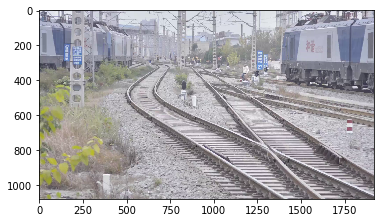

In [5]:
image = caffe.io.load_image(caffe_root+'data/test_seg_net/000004.bmp')
plt.imshow(image)

In [6]:
net.blobs['data'].data.shape

(1, 3, 720, 1280)

In [7]:
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
transformer.set_transpose('data', (2,0,1))
transformer.set_raw_scale('data', 255)      # rescale from [0, 1] to [0, 255]
transformer.set_channel_swap('data', (2,1,0))
transformer.set_mean('data', np.array([104,117,123]))

In [8]:
net.blobs['data'].reshape(1,
                         3,
                         720,
                         1280)

In [9]:
transformed_image=transformer.preprocess('data',image)

In [10]:
net.blobs['data'].data[...]=transformed_image

In [11]:
caffe.set_device(0)
caffe.set_mode_gpu()

In [12]:
net.blobs

OrderedDict([('data', <caffe._caffe.Blob at 0x7f597661b8>),
             ('conv1_1/conv', <caffe._caffe.Blob at 0x7f597662a8>),
             ('conv1_1/bn', <caffe._caffe.Blob at 0x7f59766320>),
             ('conv1_1/bn_conv1_1/bn_0_split_0',
              <caffe._caffe.Blob at 0x7f59766398>),
             ('conv1_1/bn_conv1_1/bn_0_split_1',
              <caffe._caffe.Blob at 0x7f59766410>),
             ('conv1_1/negative', <caffe._caffe.Blob at 0x7f59766488>),
             ('conv1_1/concat', <caffe._caffe.Blob at 0x7f59766500>),
             ('conv1_1/scale', <caffe._caffe.Blob at 0x7f59766578>),
             ('conv1_1/relu', <caffe._caffe.Blob at 0x7f597665f0>),
             ('pool1', <caffe._caffe.Blob at 0x7f59766668>),
             ('pool1_pool1_0_split_0', <caffe._caffe.Blob at 0x7f597666e0>),
             ('pool1_pool1_0_split_1', <caffe._caffe.Blob at 0x7f59766758>),
             ('conv2_1/1/conv', <caffe._caffe.Blob at 0x7f597667d0>),
             ('conv2_1/2/conv', <caffe._

In [13]:
a = net.forward()

In [14]:
caffe.set_device(0)
caffe.set_mode_gpu()
net.forward()
%timeit net.forward()

10 loops, best of 3: 166 ms per loop


In [15]:
len(a['conv_score'])

1

In [16]:
b=a['conv_score']
b.size

68400

In [17]:
b.shape

(1, 19, 45, 80)

In [18]:
b[0,0,23,24]

6.7613993

In [19]:
b[0,1,23,24]

-0.5738024

In [20]:
for i in range(19):
    print(b[0,i,23,24])

6.7613993
-0.5738024
3.4854007
-0.38431066
-2.5643587
-1.4157404
-2.6323752
-0.32152522
0.57674
-1.8483356
-1.3788265
4.3999867
2.5676184
-2.01436
-0.16820894
-2.098103
-2.960413
-0.66174334
1.2245783


In [21]:
for i in range(19):
    print(b[0,i,24,24])

5.750968
-1.4695274
2.4226618
-1.0212722
-2.4416344
-1.4394337
-2.5407865
-1.2333795
1.5086828
-2.661846
-2.2510371
5.992007
2.6092505
-1.2325789
1.2970614
-1.1974765
-2.5787377
0.050913874
0.42970806
